In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import logging
from numpy import random
#import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

%matplotlib inline

In [2]:
data = pd.read_csv("preProcessedData.csv")

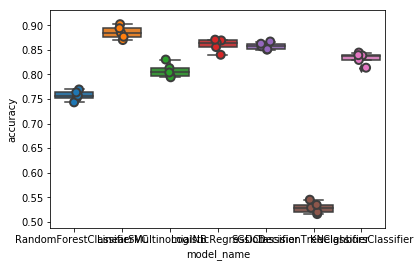

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2))

features = tfidf.fit_transform(data['Text'].values.astype('U'))
labels = data['Label']
features.shape

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=15, random_state=42),
    DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=20),
    KNeighborsClassifier(n_neighbors=6)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [4]:
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.528679
KNeighborsClassifier      0.833183
LinearSVC                 0.885736
LogisticRegression        0.860060
MultinomialNB             0.807658
RandomForestClassifier    0.757057
SGDClassifier             0.857808
Name: accuracy, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[191,  12,  13,   5,  10,   6,  13,   0,   3],
       [ 14, 209,   1,   0,   5,   1,   5,   0,  12],
       [  1,   3, 221,   0,   0,   2,   0,   0,   1],
       [  2,   2,   0, 224,   3,   1,   0,   3,   2],
       [  5,   3,   2,   8, 219,   5,  13,   2,   2],
       [  1,   1,   4,   3,   3, 214,  12,   1,   5],
       [  3,   6,   7,   2,   1,   5, 204,   1,   3],
       [  3,   0,   0,   3,   2,   1,   1, 241,   0],
       [  1,   5,   3,   2,   6,  13,   2,   1, 214]], dtype=int64)

In [6]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=data['Label'].unique()))

               precision    recall  f1-score   support

   bangladesh       0.86      0.75      0.81       253
      opinion       0.87      0.85      0.86       247
      economy       0.88      0.97      0.92       228
       sports       0.91      0.95      0.93       237
entertainment       0.88      0.85      0.86       259
   technology       0.86      0.88      0.87       244
international       0.82      0.88      0.85       232
   life-style       0.97      0.96      0.96       251
    education       0.88      0.87      0.88       247

    micro avg       0.88      0.88      0.88      2198
    macro avg       0.88      0.88      0.88      2198
 weighted avg       0.88      0.88      0.88      2198

